# PI INF442-1 : Using Results

In [1]:
# Importations

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from scipy import stats
from tqdm import tqdm

In [2]:
def load_household_data(filenames,delimiter):
    data = pd.concat((pd.read_csv(f,dtype={'date':"string",'time':"string"},delimiter=delimiter)
                      for f in filenames), ignore_index=True)
    cols = data.columns[data.dtypes.eq(object)]
    data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
    return data

In [3]:
# Chargement des tableaux de valeurs obtenus par méthodes Silouhette et Elbow

sil_forgy = pd.read_csv("silouhette_method_forgy.csv",delimiter=',').to_numpy()
sil_plusplus = pd.read_csv("silouhette_method_plusplus.csv",delimiter=',').to_numpy()
sil_random = pd.read_csv("silouhette_method_random.csv",delimiter=',').to_numpy()
elb_forgy = pd.read_csv("elbow_method_forgy.csv",delimiter=',').to_numpy()
elb_plusplus = pd.read_csv("elbow_method_plusplus.csv",delimiter=',').to_numpy()
elb_random = pd.read_csv("elbow_method_random.csv",delimiter=',').to_numpy()

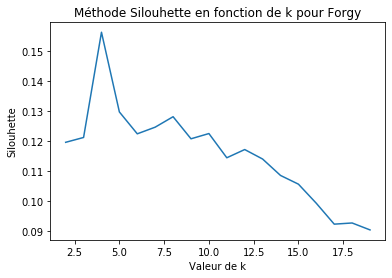

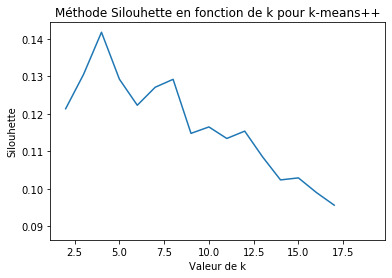

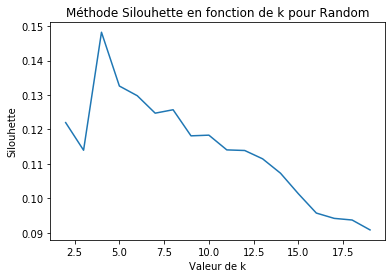

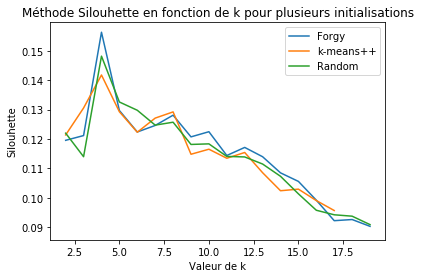

In [4]:
plt.plot(sil_forgy.T[0],sil_forgy.T[1])
plt.xlabel("Valeur de k")
plt.ylabel("Silouhette")
plt.title("Méthode Silouhette en fonction de k pour Forgy")
plt.show()

plt.plot(sil_plusplus.T[0],sil_plusplus.T[1])
plt.xlabel("Valeur de k")
plt.ylabel("Silouhette")
plt.title("Méthode Silouhette en fonction de k pour k-means++")
plt.show()

plt.plot(sil_random.T[0],sil_random.T[1])
plt.xlabel("Valeur de k")
plt.ylabel("Silouhette")
plt.title("Méthode Silouhette en fonction de k pour Random")
plt.show()

plt.plot(sil_forgy.T[0],sil_forgy.T[1],label="Forgy")
plt.plot(sil_plusplus.T[0],sil_plusplus.T[1],label="k-means++")
plt.plot(sil_random.T[0],sil_random.T[1],label="Random")
plt.legend()
plt.xlabel("Valeur de k")
plt.ylabel("Silouhette")
plt.title("Méthode Silouhette en fonction de k pour plusieurs initialisations")
plt.show()

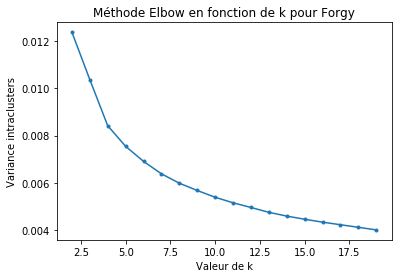

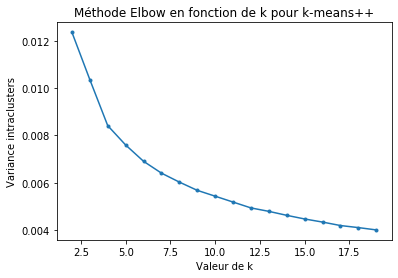

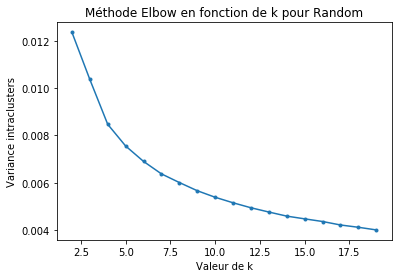

In [5]:
plt.plot(elb_forgy.T[0],elb_forgy.T[1],'.-')
plt.xlabel("Valeur de k")
plt.ylabel("Variance intraclusters")
plt.title("Méthode Elbow en fonction de k pour Forgy")
plt.show()

plt.plot(elb_plusplus.T[0],elb_plusplus.T[1],'.-')
plt.xlabel("Valeur de k")
plt.ylabel("Variance intraclusters")
plt.title("Méthode Elbow en fonction de k pour k-means++")
plt.show()

plt.plot(elb_random.T[0],elb_random.T[1],'.-')
plt.xlabel("Valeur de k")
plt.ylabel("Variance intraclusters")
plt.title("Méthode Elbow en fonction de k pour Random")
plt.show()

In [6]:
# Chargement des données du kmeans pour la détection de saison

h_day_kmeans = load_household_data(["kmeans_4_plusplus.csv"],",")

h_rows_2007 = [r for r in range(len(h_day_kmeans)) if h_day_kmeans["date"][r][-4:] == "2007"]
h_rows_2008 = [r for r in range(len(h_day_kmeans)) if h_day_kmeans["date"][r][-4:] == "2008"]
h_rows_2009 = [r for r in range(len(h_day_kmeans)) if h_day_kmeans["date"][r][-4:] == "2009"]
h_rows_2010 = [r for r in range(len(h_day_kmeans)) if h_day_kmeans["date"][r][-4:] == "2010"]

seasons_2007 = (h_day_kmeans.iloc[h_rows_2007]).drop(h_day_kmeans.columns[1:8],axis=1).to_numpy().T
seasons_2008 = (h_day_kmeans.iloc[h_rows_2008]).drop(h_day_kmeans.columns[1:8],axis=1).to_numpy().T
seasons_2009 = (h_day_kmeans.iloc[h_rows_2009]).drop(h_day_kmeans.columns[1:8],axis=1).to_numpy().T
seasons_2010 = (h_day_kmeans.iloc[h_rows_2010]).drop(h_day_kmeans.columns[1:8],axis=1).to_numpy().T

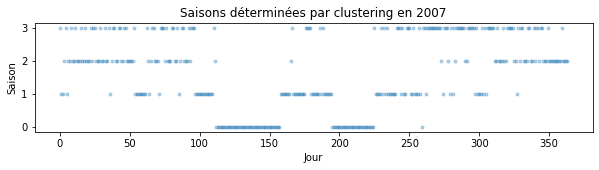

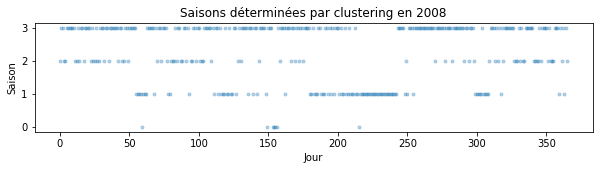

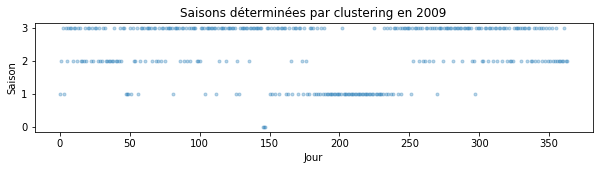

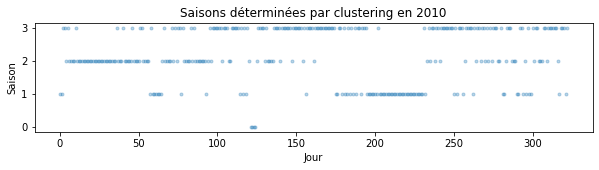

In [7]:
plt.figure(figsize=(10,2))

plt.plot(seasons_2007[1],'.',alpha=0.3)
plt.xlabel("Jour")
plt.ylabel("Saison")
plt.title("Saisons déterminées par clustering en 2007")
plt.show()

plt.figure(figsize=(10,2))

plt.plot(seasons_2008[1],'.',alpha=0.3)
plt.xlabel("Jour")
plt.ylabel("Saison")
plt.title("Saisons déterminées par clustering en 2008")
plt.show()

plt.figure(figsize=(10,2))

plt.plot(seasons_2009[1],'.',alpha=0.3)
plt.xlabel("Jour")
plt.ylabel("Saison")
plt.title("Saisons déterminées par clustering en 2009")
plt.show()

plt.figure(figsize=(10,2))

plt.plot(seasons_2010[1],'.',alpha=0.3)
plt.xlabel("Jour")
plt.ylabel("Saison")
plt.title("Saisons déterminées par clustering en 2010")
plt.show()

In [8]:
# Séparation des saisons pour avoir les heures par saisons

h_day_kmeans = load_household_data(["kmeans_4_plusplus.csv"],",")
h_hour_norm = load_household_data(["household_power_consumption/preprocessed/preprocessed_household_norm_hour.csv"],",")

h_season_0 = h_day_kmeans.drop(h_day_kmeans.index[h_day_kmeans.index[h_day_kmeans["label"] != 0]],0,inplace=False)
h_season_1 = h_day_kmeans.drop(h_day_kmeans.index[h_day_kmeans.index[h_day_kmeans["label"] != 1]],0,inplace=False)
h_season_2 = h_day_kmeans.drop(h_day_kmeans.index[h_day_kmeans.index[h_day_kmeans["label"] != 2]],0,inplace=False)
h_season_3 = h_day_kmeans.drop(h_day_kmeans.index[h_day_kmeans.index[h_day_kmeans["label"] != 3]],0,inplace=False)

h_season_0.head()

,date,global_active_power,globale_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3,label
112,23/4/2007,0.084864,0.110298,0.453494,0.092853,0.023747,0.009247,0.134521,0
113,24/4/2007,0.082847,0.109992,0.392405,0.089238,0.019055,0.009631,0.149642,0
114,25/4/2007,0.103684,0.133958,0.379357,0.110850,0.000000,0.026846,0.197401,0
115,26/4/2007,0.104699,0.133039,0.374388,0.112841,0.022426,0.033717,0.160461,0
116,27/4/2007,0.088434,0.131674,0.388244,0.094318,0.030014,0.009960,0.106541,0


In [9]:
def séparation_heures(dataframe):
    hours_csv = []
    for i in range(18,22):
        data_temp = pd.DataFrame(columns=['date','time','global_active_power','globale_reactive_power','voltage', 'global_intensity','sub_metering_1','sub_metering_2', 'sub_metering_3'])
        for r in range(len(dataframe)):
            if (int(dataframe.iloc[r,1][0:2]) == i):
                add_data = pd.DataFrame([[dataframe.iloc[r,i] for i in range(9)]], columns=['date','time','global_active_power','globale_reactive_power','voltage', 'global_intensity','sub_metering_1','sub_metering_2', 'sub_metering_3'])
                data_temp = data_temp.append(add_data)
        hours_csv += [data_temp]
    return hours_csv

hours_csv = séparation_heures(h_hour_norm)

In [10]:
for i in range(4):
    hours_csv[i] = hours_csv[i].sort_values("global_active_power")

In [11]:
def séparation_saisons(dataframe):
    saisons_csv = []

    data_temp = pd.DataFrame(columns=['date','time','global_active_power','globale_reactive_power','voltage', 'global_intensity','sub_metering_1','sub_metering_2', 'sub_metering_3'])
    for r in range(len(dataframe)):
        if (dataframe.iloc[r,0] in list(h_season_0['date'])):
            add_data = pd.DataFrame([[dataframe.iloc[r,i] for i in range(9)]], columns=['date','time','global_active_power','globale_reactive_power','voltage', 'global_intensity','sub_metering_1','sub_metering_2', 'sub_metering_3'])
            data_temp = data_temp.append(add_data)
    saisons_csv += [data_temp]
    
    data_temp = pd.DataFrame(columns=['date','time','global_active_power','globale_reactive_power','voltage', 'global_intensity','sub_metering_1','sub_metering_2', 'sub_metering_3'])
    for r in range(len(dataframe)):
        if (dataframe.iloc[r,0] in list(h_season_1['date'])):
            add_data = pd.DataFrame([[dataframe.iloc[r,i] for i in range(9)]], columns=['date','time','global_active_power','globale_reactive_power','voltage', 'global_intensity','sub_metering_1','sub_metering_2', 'sub_metering_3'])
            data_temp = data_temp.append(add_data)
    saisons_csv += [data_temp]
    
    data_temp = pd.DataFrame(columns=['date','time','global_active_power','globale_reactive_power','voltage', 'global_intensity','sub_metering_1','sub_metering_2', 'sub_metering_3'])
    for r in range(len(dataframe)):
        if (dataframe.iloc[r,0] in list(h_season_2['date'])):
            add_data = pd.DataFrame([[dataframe.iloc[r,i] for i in range(9)]], columns=['date','time','global_active_power','globale_reactive_power','voltage', 'global_intensity','sub_metering_1','sub_metering_2', 'sub_metering_3'])
            data_temp = data_temp.append(add_data)
    saisons_csv += [data_temp]
    
    data_temp = pd.DataFrame(columns=['date','time','global_active_power','globale_reactive_power','voltage', 'global_intensity','sub_metering_1','sub_metering_2', 'sub_metering_3'])
    for r in range(len(dataframe)):
        if (dataframe.iloc[r,0] in list(h_season_3['date'])):
            add_data = pd.DataFrame([[dataframe.iloc[r,i] for i in range(9)]], columns=['date','time','global_active_power','globale_reactive_power','voltage', 'global_intensity','sub_metering_1','sub_metering_2', 'sub_metering_3'])
            data_temp = data_temp.append(add_data)
    saisons_csv += [data_temp]
    
    return saisons_csv

saisons_hour_18 = séparation_saisons(hours_csv[0])
saisons_hour_19 = séparation_saisons(hours_csv[1])
saisons_hour_20 = séparation_saisons(hours_csv[2])
saisons_hour_21 = séparation_saisons(hours_csv[3])

In [12]:
# Exportation en fichiers csv

for i in range(4):
    saisons_hour_18[i].to_csv(f"hour_18_saison_{i}.csv", index = False)
    
for i in range(4):
    saisons_hour_19[i].to_csv(f"hour_19_saison_{i}.csv", index = False)
    
for i in range(4):
    saisons_hour_20[i].to_csv(f"hour_20_saison_{i}.csv", index = False)
    
for i in range(4):
    saisons_hour_21[i].to_csv(f"hour_21_saison_{i}.csv", index = False)

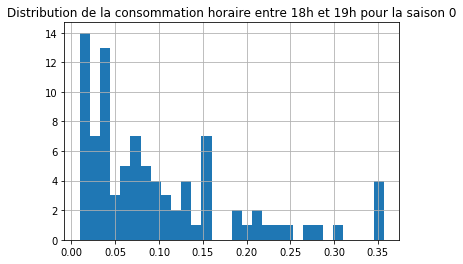

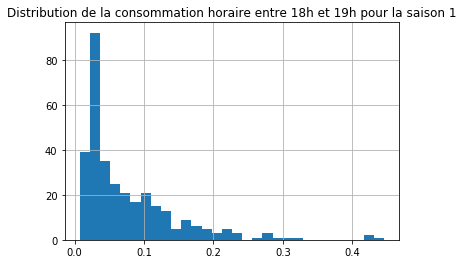

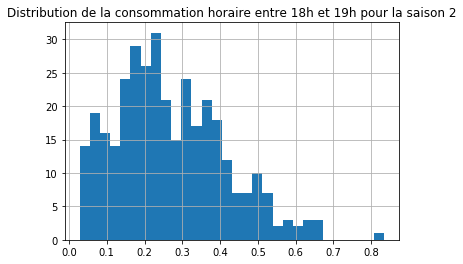

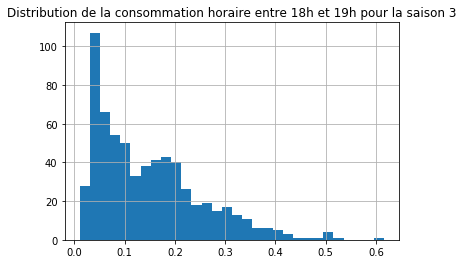

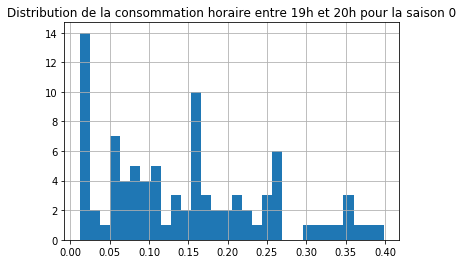

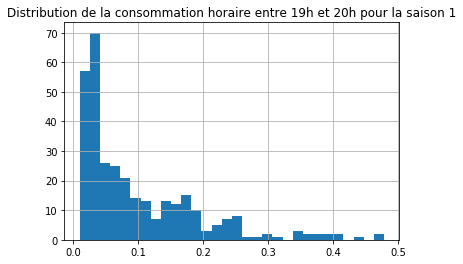

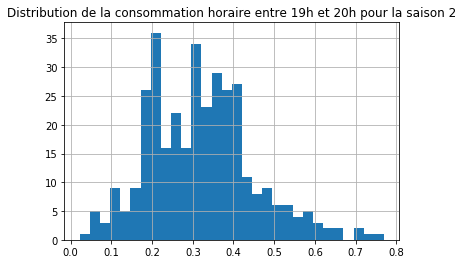

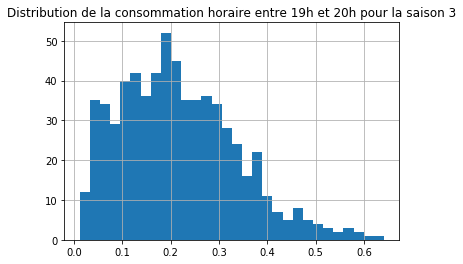

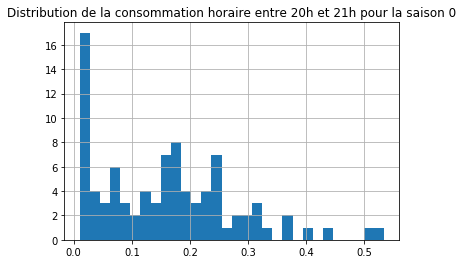

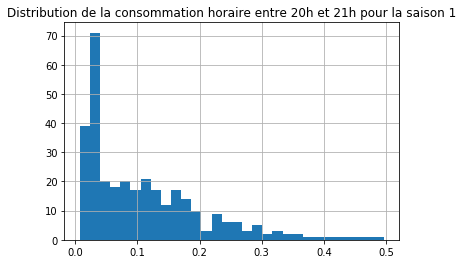

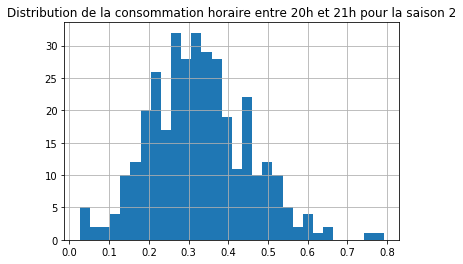

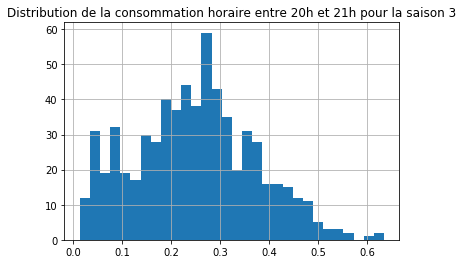

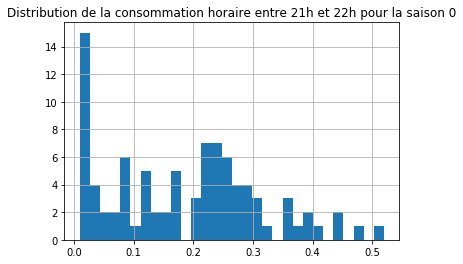

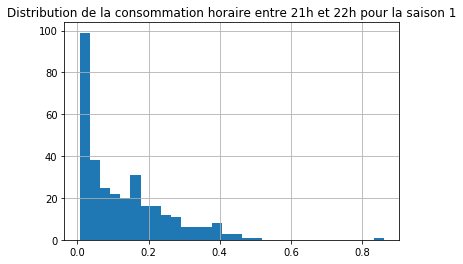

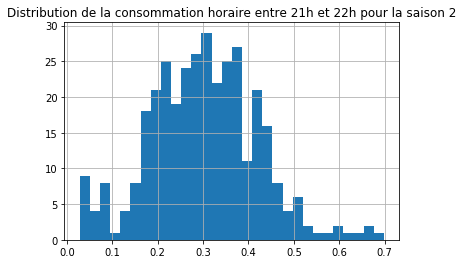

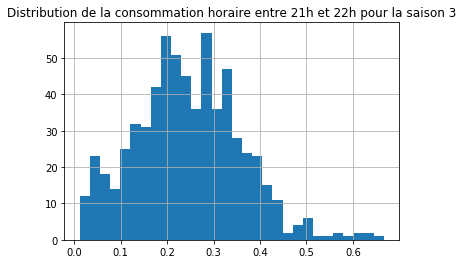

In [15]:
# Affichage des histogrammes des heures par saisons

for i in range(4):
    hist = saisons_hour_18[i]["global_active_power"].hist(bins=30)
    plt.title(f"Distribution de la consommation horaire entre 18h et 19h pour la saison {i}")
    plt.show()
    
for i in range(4):
    hist = saisons_hour_19[i]["global_active_power"].hist(bins=30)
    plt.title(f"Distribution de la consommation horaire entre 19h et 20h pour la saison {i}")
    plt.show()
    
for i in range(4):
    hist = saisons_hour_20[i]["global_active_power"].hist(bins=30)
    plt.title(f"Distribution de la consommation horaire entre 20h et 21h pour la saison {i}")
    plt.show()

for i in range(4):
    hist = saisons_hour_21[i]["global_active_power"].hist(bins=30)
    plt.title(f"Distribution de la consommation horaire entre 21h et 22h pour la saison {i}")
    plt.show()